In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
X,y =make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],cluster_std=[0.4,0.2,0.2,0.2],random_state=9)

In [4]:
X

array([[-8.41028464e-01, -3.36118553e-01],
       [-1.78355178e-03,  3.07827932e-01],
       [ 8.28954868e-01,  1.00510410e+00],
       ...,
       [-1.63916905e-01, -2.22806370e-01],
       [ 2.29264700e+00,  2.01264954e+00],
       [-9.69725851e-01, -1.08219369e+00]])

In [5]:
y

array([0, 1, 2, 1, 0, 3, 1, 2, 0, 3, 2, 3, 3, 3, 1, 0, 1, 0, 2, 3, 0, 2,
       3, 0, 2, 2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 2, 3, 1, 1, 0, 1, 3, 3, 1,
       1, 0, 1, 3, 1, 0, 0, 1, 1, 3, 1, 3, 0, 1, 0, 2, 2, 0, 1, 1, 3, 3,
       3, 3, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1,
       3, 0, 1, 1, 3, 3, 3, 2, 3, 0, 2, 1, 1, 3, 2, 0, 2, 1, 2, 1, 3, 3,
       2, 0, 2, 3, 1, 0, 0, 2, 0, 2, 0, 2, 3, 1, 2, 2, 2, 0, 2, 1, 0, 0,
       0, 3, 3, 0, 2, 1, 2, 0, 1, 0, 0, 2, 3, 2, 1, 0, 0, 1, 1, 2, 1, 3,
       3, 2, 1, 2, 2, 1, 1, 1, 3, 2, 0, 0, 0, 3, 0, 2, 3, 0, 0, 3, 3, 2,
       3, 1, 3, 0, 3, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3,
       0, 1, 0, 3, 1, 2, 1, 3, 2, 3, 3, 1, 3, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       3, 0, 3, 0, 1, 3, 0, 3, 3, 1, 0, 1, 2, 0, 2, 1, 2, 2, 3, 1, 2, 1,
       1, 1, 0, 3, 0, 2, 3, 1, 0, 0, 2, 3, 2, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       2, 3, 1, 0, 0, 3, 0, 1, 0, 3, 3, 3, 2, 3, 2, 2, 1, 1, 0, 1, 0, 3,
       0, 1, 2, 2, 2, 1, 1, 0, 0, 3, 2, 2, 3, 2, 2,

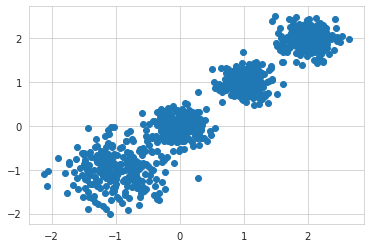

In [6]:
plt.scatter(X[:,0],X[:,1],marker='o')

In [7]:
y_predict = KMeans(n_clusters=4,random_state=9).fit_predict(X)

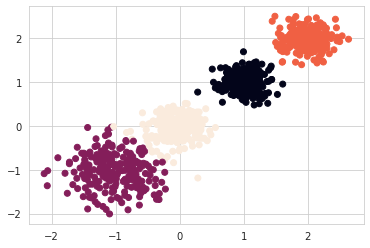

In [8]:
plt.scatter(X[:,0],X[:,1],marker='o',c = y_predict)

In [9]:
silhouette_score(X,y_predict)

0.6634549555891298

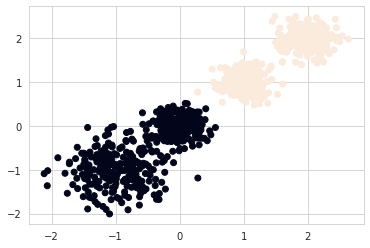

In [16]:
y_predict = KMeans(n_clusters=2,random_state=9).fit_predict(X)
plt.scatter(X[:,0],X[:,1],marker='o',c = y_predict)

In [17]:
silhouette_score(X,y_predict)

0.6435178953651656

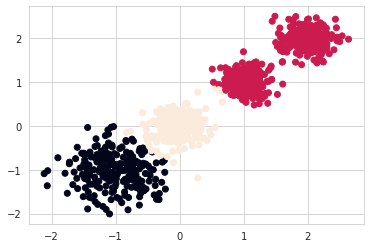

In [19]:
y_predict = KMeans(n_clusters=3,random_state=9).fit_predict(X)
plt.scatter(X[:,0],X[:,1],marker='o',c = y_predict)

In [20]:
silhouette_score(X,y_predict)

0.5763040407094536

## 低方差特征过滤

In [39]:
import pandas as pd
data = pd.read_csv('data/垃圾邮件分类数据.csv')

In [40]:
data.shape

(971, 25734)

In [42]:
from sklearn.feature_selection import VarianceThreshold
transformer = VarianceThreshold(threshold=0.1)
data = transformer.fit_transform(data)
data.shape

(971, 1044)

## 计算相关系数

In [43]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()

In [45]:
data = pd.DataFrame(data.data,columns=data.feature_names)

In [46]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
pearsonr(data['sepal length (cm)'],data['sepal width (cm)'])

(-0.11756978413300204, 0.15189826071144918)

In [48]:
spearmanr(data['sepal length (cm)'],data['sepal width (cm)'])

SpearmanrResult(correlation=-0.166777658283235, pvalue=0.04136799424884587)

In [49]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [50]:
data.corr('spearman')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.166778,0.881898,0.834289
sepal width (cm),-0.166778,1.000000,-0.309635,-0.289032
petal length (cm),0.881898,-0.309635,1.000000,0.937667
petal width (cm),0.834289,-0.289032,0.937667,1.000000


## PCA 降维

In [51]:
from sklearn.decomposition import PCA
x,y = load_iris(return_X_y=True)
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [52]:
transformer = PCA(n_components=0.95)
x_pca = transformer.fit_transform(x)
x_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [53]:
transformer = PCA(n_components=3)
x_pca = transformer.fit_transform(x)
x_pca

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

## 用户聚类案例

In [21]:
import pandas as pd
dataset = pd.read_csv('data/customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- 使用后两列数据进行分群

In [24]:
X = dataset.iloc[:,[3,4]].values

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [26]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [29]:
dataset.loc[:,'label'] = y_kmeans
dataset.groupby('label').Age.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,22.0,25.272727,5.257030,18.0,21.25,23.5,29.75,35.0
1,81.0,42.716049,16.447822,18.0,27.00,46.0,54.00,70.0
2,39.0,32.692308,3.728650,27.0,30.00,32.0,35.50,40.0
3,23.0,45.217391,13.228607,19.0,35.50,46.0,53.50,67.0
4,35.0,41.114286,11.341676,19.0,34.00,42.0,47.50,59.0


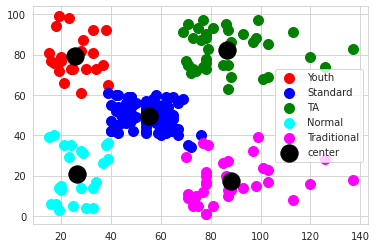

In [36]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Youth')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='TA')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Normal')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='magenta',label='Traditional')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='center')
plt.legend()
plt.show()

In [30]:
y_kmeans==0

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

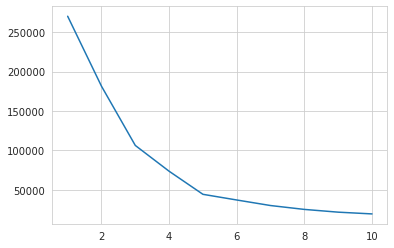

In [38]:
plt.plot(range(1,11),wcss)